In [ ]:
# asdasdsdf

In [2]:
import os
import pandas as pd
import numpy as np

from plotly import express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

import cufflinks as cf 
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from matplotlib import pyplot as plt
import seaborn as sns

# ‰∏≠ÊñáNLPÂ∑•ÂÖ∑
from string import punctuation
import re

import tqdm 
tqdm.tqdm_notebook().pandas()

pd.set_option('display.max_rows', 300)

In [3]:
df = pd.read_csv('../data/aggregated_data.csv')

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['date'].min(), df['date'].max()

(Timestamp('2020-03-17 00:00:00'), Timestamp('2020-05-30 00:00:00'))

In [45]:
from preprocessing import add_identity
df=add_identity(df)

In [31]:
df.shape

(3630, 28)

In [34]:
df.ÁÇπËµûÊï∞.sum()

497735

In [33]:
df.ËΩ¨ÂèëÊï∞.sum()

35927

In [32]:
df.ËØÑËÆ∫Êï∞.sum()

90420

In [36]:
df.nb_interactivity.sum()

627712

## EDA

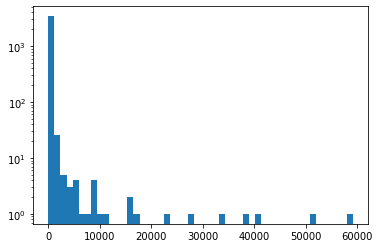

In [7]:
plt.hist(df['nb_interactivity'], bins= 50)
plt.yscale('log')

In [37]:
data = df.groupby('date').agg({'ÂæÆÂçöÊ≠£Êñá' : 'count', 'ËΩ¨ÂèëÊï∞':'sum'})[['ÂæÆÂçöÊ≠£Êñá','ËΩ¨ÂèëÊï∞']].reset_index()
data['Âπ≥ÂùáËΩ¨ÂèëÊï∞'] = data['ËΩ¨ÂèëÊï∞']/data['ÂæÆÂçöÊ≠£Êñá']
fig = px.bar(data_frame=data, y='ÂæÆÂçöÊ≠£Êñá',x='date',text='ÂæÆÂçöÊ≠£Êñá')
fig.update_layout(width=1000, title = '‰∫î‰∏™‰∏ÄÊîøÁ≠ñ-ÊØèÊó•ÂéüÂàõÂæÆÂçöÊï∞')
fig.show()


In [38]:
fig = df.ÂèëÂ∏ÉËÄÖÂú∞Âå∫.value_counts().iloc[:15].iplot(kind='barh', asFigure=True)
fig.update_layout(height=400, title='ÂæÆÂçöÂèëÂ∏ÉËÄÖÊâÄÂú®Âú∞Âå∫ Count')

In [49]:
df[['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum(axis=0)

if_Â§ßV       263
if_ÂÆòÂ™í       264
if_Ëá™Â™í        91
if_‰∏™‰∫∫Áî®Êà∑    3210
dtype: int64

In [66]:
(df[df.ÂèëÂ∏ÉËÄÖÂú∞Âå∫ == 'Êµ∑Â§ñ'][['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum(axis=0)/df[df.ÂèëÂ∏ÉËÄÖÂú∞Âå∫ == 'Êµ∑Â§ñ'][['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum(axis=0).sum()).round(2)

if_Â§ßV      0.02
if_ÂÆòÂ™í      0.01
if_Ëá™Â™í      0.02
if_‰∏™‰∫∫Áî®Êà∑    0.94
dtype: float64

In [67]:
(df[df.ÂèëÂ∏ÉËÄÖÂú∞Âå∫ == 'Âåó‰∫¨'][['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum(axis=0)/df[df.ÂèëÂ∏ÉËÄÖÂú∞Âå∫ == 'Âåó‰∫¨'][['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum(axis=0).sum()).round(2)

if_Â§ßV      0.19
if_ÂÆòÂ™í      0.16
if_Ëá™Â™í      0.04
if_‰∏™‰∫∫Áî®Êà∑    0.61
dtype: float64

In [65]:
(df[df.ÂèëÂ∏ÉËÄÖÂú∞Âå∫ == '‰∏äÊµ∑'][['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum(axis=0)/df[df.ÂèëÂ∏ÉËÄÖÂú∞Âå∫ == '‰∏äÊµ∑'][['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum().sum()).round(2)

if_Â§ßV      0.10
if_ÂÆòÂ™í      0.06
if_Ëá™Â™í      0.03
if_‰∏™‰∫∫Áî®Êà∑    0.81
dtype: float64

In [ ]:
df['c'] = 0
df.loc[df['if_Â§ßV']==1,'c'] = 1

In [10]:
df[['ËΩ¨ÂèëÊï∞','ËØÑËÆ∫Êï∞','ÁÇπËµûÊï∞']].quantile(0.99)

ËΩ¨ÂèëÊï∞     122.68
ËØÑËÆ∫Êï∞     339.72
ÁÇπËµûÊï∞    1520.32
Name: 0.99, dtype: float64

In [72]:
delays = (df['date']-df['date'].min()).dt.days.values
(delays**2)/10

array([ 10. ,   8.1,  14.4, ..., 504.1, 504.1, 504.1])

In [80]:
# ÂÖ≥Ê≥®Â∫¶
df_temp = df[df['ÂèëÂ∏ÉËÄÖÂú∞Âå∫'] == 'Âåó‰∫¨']
delays = (df_temp['date'] - df_temp['date'].min()).dt.days.values

# color_pallet = sns.color_palette('RdBu_r',delays.max()+1)

fig=go.Figure(layout=dict(width=800, height=700, title='Âåó‰∫¨Âú∞Âå∫ÂØπ‚Äò‰∫î‰∏™‰∏ÄÊîøÁ≠ñ‚Äô ËØùÈ¢òÂÖ≥Ê≥®Â∫¶ - È¢úËâ≤Ë∂äÊµÖ,ÂèëÂ∏ÉÊó∂Èó¥Ë∂ä‰πÖ'))

trace = go.Scatter(
    x=df_temp['ÂèëÂ∏ÉËÄÖÁ≤â‰∏ùÊï∞'],
    y=df_temp['nb_interactivity'],
    opacity=0.7,
    mode='markers',
    marker=dict(
        # size=(delays**2)/500,
        color=delays[::-1]
    ),
    text=df_temp['date'].dt.date
)

fig.add_trace(trace)
fig.update_layout(
    yaxis={'type':'log', 'title':'‰∫íÂä®Ê¨°Êï∞'}, 
    xaxis={'type':'log', 'title':'ÂèëÂ∏ÉËÄÖÁ≤â‰∏ùÊï∞'})
fig.show()

In [93]:
df[['ÂæÆÂçöÊ≠£Êñá','text_preprocessed']].iloc[809:811].values

array([['ÊòìÂ∞¨‰∏ÄÁàÜÁÇ∏HAN:‰ªéÂ∞èÂà∞Â§ß Â∞±Ë¢´ËØ¥ Ê≤°ÂøÉÊ≤°ËÇ∫ ÂæàÂ§ö‰∫ãÊÉÖ‰∏çÂÆπÊòìÂΩìÂõû‰∫ã‰ΩÜÁúüÁöÑËøô‰∏™‰∫î‰∏™‰∏Ä ÈôêËà™ÊîøÁ≠ñ ÊÉ≥ÂøÖ ÊàëËÉΩËÆ∞Âæà‰πÖ ÁîöËá≥‰∏ÄËæàÂ≠êÂêß Ëã±ÂõΩ¬∑Ê†ºÊãâÊñØÂì• \xa0ÊòæÁ§∫Âú∞Âõæ\xa0',
        '‰ªéÂ∞èÂà∞Â§ß Â∞±Ë¢´ËØ¥ Ê≤°ÂøÉÊ≤°ËÇ∫ ÂæàÂ§ö‰∫ãÊÉÖ‰∏çÂÆπÊòìÂΩìÂõû‰∫ã‰ΩÜÁúüÁöÑËøô‰∏™‰∫î‰∏™‰∏Ä ÈôêËà™ÊîøÁ≠ñ ÊÉ≥ÂøÖ ÊàëËÉΩËÆ∞Âæà‰πÖ ÁîöËá≥‰∏ÄËæàÂ≠êÂêß Ëã±ÂõΩ¬∑Ê†ºÊãâÊñØÂì• ÊòæÁ§∫Âú∞Âõæ'],
       ['Ëä±Ëä±Êú®ÂçéBirch:ÂàöÂàöÁúã‰∫ÜÊù°ÂæÆÂçö ÊúâÊÑüËÄåÂèë #ÂõΩÈôÖÂÆ¢ËøêËà™Áè≠‰∫î‰∏™‰∏ÄÊîøÁ≠ñ##‰∏≠ÂõΩÊ∞ëËà™Â±Ä##‰∫∫Ê∞ëÁΩë# \xa0',
        'ÂàöÂàöÁúã‰∫ÜÊù°ÂæÆÂçö ÊúâÊÑüËÄåÂèë ÂõΩÈôÖÂÆ¢ËøêËà™Áè≠‰∫î‰∏™‰∏ÄÊîøÁ≠ñ‰∏≠ÂõΩÊ∞ëËà™Â±Ä‰∫∫Ê∞ëÁΩë']], dtype=object)

## ÊÉÖÊÑüÂàÜÊûê

In [119]:
df[(df['sentiment']==1)][['ÂæÆÂçöÊ≠£Êñá','sentiment']].values.tolist()

‚Äú‰∏Ä‰∏™‰∏≠ÂõΩ‰∫∫‰∏ÄÊó¶Âá∫ÂõΩÂΩì‰∫Ü‰∏Ä‰∏™ÁïôÂ≠¶ÁîüÂ∞±‰ºö‰∏ÄÁõ¥‰π∞‰∏çÂà∞‰∏ÄÂº†ÂõûÂõΩÁöÑÊú∫Á•®ÔºåÁÆÄÁß∞‰∫î‰∏™‰∏Ä‚ÄùÂìà Âìà Âìà Âìà Âìà ÂìàüñïüèªËøôÂ∞±ÊòØ‰∏âÊúà‰ªΩËÄÅËÄÅÂÆûÂÆûÂê¨ËØùÂ∞±Âú∞ÈöîÁ¶ªÁöÑÁªìÊûúÂêó ÁæéÂõΩ¬∑University of California Irvine \xa0ÊòæÁ§∫Âú∞Âõæ\xa0',
  1],
 ['ÂíåÂπ≥Ëπ≤Â∞è:@‰∏≠ÂõΩÊ∞ëËà™ÁΩë ËØ∑ÈóÆ‰ªÄ‰πàÊó∂ÂÄôËÉΩÂ§üÊîæÂÆΩ‚Äú‰∫î‰∏™‰∏Ä‚ÄùÊîøÁ≠ñÔºüÂéüÂõ†Â¶Ç‰∏ãÔºö1.Áé∞Âú®Âú®Ê¨ßÁæé‰∏Ä‰∫õÂõΩÂÆ∂ÔºåÁñ´ÊÉÖÂ∑≤ÁªèÊúâ‰∏Ä‰∫õÂ•ΩËΩ¨„ÄÇ‚Äú‰∫î‰∏™‰∏Ä‚ÄùÊîøÁ≠ñËôΩÁÑ∂ËÉΩÂ§üÈòªÊñ≠ÁóÖÊØíËæìÂÖ•ÊÄß‰º†Êí≠Ôºå‰ΩÜÊòØËøôÂ∑≤ÁªèÊòØ‰∏âÊúà‰ªΩÂá∫ÁöÑÊîøÁ≠ñÔºåÂ∫îËØ•ÈÄÇÊó∂ÊîπÂèòÊîøÁ≠ñÔºåÊîæÂÆΩËøô‰∫õÊîøÁ≠ñÔºàÂ∑≤ÁªèÊúâ‰∏Ä‰∫õ‰∏çÁ¨¶ÂêàÁé∞Âú®ÂÆûÈôÖÔºâ2.ÁïôÂ≠¶ÁîüÊÉ≥‰πòÂÖ•Â¢ÉËà™Áè≠ÂõûÂÆ∂Ôºå‰ΩÜÁî±‰∫éÊàëÂõΩ‚Äú‰∫î‰∏™‰∏Ä‚ÄùÊîøÁ≠ñÔºåËá¥‰ΩøÊù•Ëá™ÊÖïÂ∞ºÈªë Á∫ΩÁ∫¶Á≠âÂú∞ÁïôÂ≠¶ÁîüÊú™ËÉΩÂΩíÂõΩÔºåÁõ∏Âèç‚ÄúÂä©Èïø‚Äù‰∫ÜÂΩíÂõΩËà™Áè≠Ë¥µ Ëà™Áè≠Â∞ëÁöÑÊÄÅÂäø„ÄÇÊàëÊÅ≥ËØ∑ÊÄªÂ±ÄÂ§ßÂ§ßËÉΩÂ§üÈÖåÊÉÖËÄÉËôëÔºåÂÅöÂá∫ÈÄÇÂΩìÁöÑÈÄÇÊó∂ÁöÑÂÜ≥Á≠ñ„ÄÇ\xa0',
  1],
 ['-Â±ïÁ∫¢Áª´:Ë∞Å‰ºöÊÉ≥Âà∞ËøôÊòØÊàëÊúÄËøëÂêÉÁöÑÊúÄÂ•ΩÁöÑ‰∏ÄÈ°øÈ•≠‚Ä¶‚Ä¶Â§©Â§©ÂêÉÈù¢ÁúüÁö

In [95]:
df.sentiment.value_counts()

0    2191
2    1297
1     142
Name: sentiment, dtype: int64

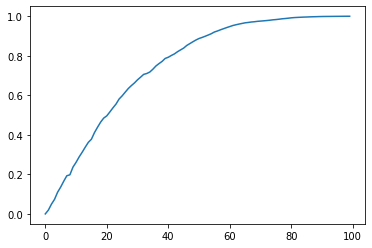

In [129]:
plt.plot([df['confidence'].quantile(i*0.01) for i in range(100)])

In [122]:
df['positive'] = 0
df['negative'] = 0
df['neutre'] = 0

df.loc[df['sentiment'] == 2, 'positive'] = 1
df.loc[df['sentiment'] == 0,'negative'] = 1
df.loc[df['sentiment'] == 1,'neutre'] = 1

In [135]:
import plotly.figure_factory as ff

df_temp = df[df['confidence'] > 0.8]
# ‰∏çÂêåÊÉÖÊÑüÁöÑÂæÆÂçöÊØèÊó•Êï∞Èáè
data = df_temp.groupby('date').agg({
    'positive':'sum',
    'negative':'sum',
    'neutre':'sum',
    })

# data = pd.DataFrame(data.values / data.sum(axis=1).values.reshape(-1,1), index=data.index, columns=data.columns)

data = pd.melt(data.reset_index(), id_vars='date', value_vars=['positive','negative','neutre'])

fig = px.bar(data_frame=data, x='date',y='value',color='variable', )
fig.update_layout(
    height=300,
    width=800,
    title='ÊÉÖÊÑüÂàÜÊûêÂèòÂåñ Êï∞ÂÄº')
fig.show()

# ‰∏çÂêåÊÉÖÊÑüÁöÑÂæÆÂçöÊØèÊó•ÊØî‰æã
data = df_temp.groupby('date').agg({
    'positive':'sum',
    'negative':'sum',
    'neutre':'sum',
    })

data = pd.DataFrame(data.values / data.sum(axis=1).values.reshape(-1,1), index=data.index, columns=data.columns)

data = pd.melt(data.reset_index(), id_vars='date', value_vars=['positive','negative','neutre'])

fig = px.bar(data_frame=data, x='date',y='value',color='variable', )
fig.update_layout(
    height=300,
    width=800,
    title='ÊÉÖÊÑüÂàÜÊûêÂèòÂåñ Áõ∏ÂØπÊØî‰æã')
fig.show()

# ÁΩÆ‰ø°Â∫¶

fig = ff.create_distplot([df_temp.loc[df_temp['sentiment'] == 2, 'confidence'].values,
                          df_temp.loc[df_temp['sentiment'] == 0, 'confidence'].values], ['Positive', 'Negative'], bin_size=[0.05, .025])
fig.update_layout(width=800, height=500, title='Confidence Distribution')
fig.show()

In [18]:
def add_identity(df):
    
    # Â¶Ç‰ΩïÁïåÂÆöÂ§ßV , 50w Á≤â‰∏ù 
    df['if_Â§ßV'] = 0
    df.loc[df['ÂèëÂ∏ÉËÄÖÁ≤â‰∏ùÊï∞']>=500000, 'if_Â§ßV'] = 1

    # Â§öÁ≤â Â∞ë‰∫íÂä®
    df['if_ÂÆòÂ™í'] = 0
    df.loc[(df['nb_interactivity']/(df['ÂèëÂ∏ÉËÄÖÁ≤â‰∏ùÊï∞']+1)) < 0.00002, 'if_ÂÆòÂ™í'] = 1

    # Â§öÁ≤â È´ò‰∫íÂä®`
    df['if_Ëá™Â™í'] = 0
    df.loc[((df['nb_interactivity']/(df['ÂèëÂ∏ÉËÄÖÁ≤â‰∏ùÊï∞']+1))>0.0005)&(df['ÂèëÂ∏ÉËÄÖÁ≤â‰∏ùÊï∞']>50000), 'if_Ëá™Â™í'] = 1

    # Ë∫´‰ªΩ‰øÆÊ≠£
    ## ÂÆòÂ™í list
    l1 = ['‰∏≠ÂõΩÊ∞ëËà™ÁΩë','']
    df.loc[df['ÂèëÂ∏ÉËÄÖÂßìÂêç'].isin(l1), 'if_ÂÆòÂ™í'] = 1
    df.loc[df['ÂèëÂ∏ÉËÄÖÂßìÂêç'].isin(l1), 'if_Ëá™Â™í'] = 0
    df.loc[df['ÂèëÂ∏ÉËÄÖÂßìÂêç'].isin(l1), 'if_‰∏™‰∫∫Áî®Êà∑'] = 0

    ## Ëá™Â™í list
    l2 = ['Â∞èqqqÈòø','ËÉ°ËàíÁ´ã','FATIII']
    df.loc[df['ÂèëÂ∏ÉËÄÖÂßìÂêç'].isin(l2), 'if_ÂÆòÂ™í'] = 0
    df.loc[df['ÂèëÂ∏ÉËÄÖÂßìÂêç'].isin(l2), 'if_Ëá™Â™í'] = 1
    df.loc[df['ÂèëÂ∏ÉËÄÖÂßìÂêç'].isin(l2), 'if_‰∏™‰∫∫Áî®Êà∑'] = 0

    # ÂÖ∂‰ªñ 
    df['if_‰∏™‰∫∫Áî®Êà∑'] = 0
    df.loc[(df['if_Â§ßV'] == 0) & (df['if_ÂÆòÂ™í'] == 0) & (df['if_Ëá™Â™í'] == 0),'if_‰∏™‰∫∫Áî®Êà∑'] = 1

    return df
df = add_identity(df)

In [19]:
df[['if_Â§ßV', 'if_ÂÆòÂ™í','if_Ëá™Â™í','if_‰∏™‰∫∫Áî®Êà∑']].sum(axis=0)

if_Â§ßV       241
if_ÂÆòÂ™í       258
if_Ëá™Â™í        71
if_‰∏™‰∫∫Áî®Êà∑    2830
dtype: int64

In [127]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Ë¥üÈù¢', '‰∏≠ÊÄß','Ê≠£Èù¢'], 
                     values=df[df['ÂèëÂ∏ÉËÄÖÂú∞Âå∫']=='Êµ∑Â§ñ']['sentiment'].value_counts().sort_index(), 
                     hole=.6,
                     name = 'Êµ∑Â§ñÂæÆÂçöÊÉÖÁª™'), 1,1)
fig.add_trace(go.Pie(labels=['Ë¥üÈù¢', '‰∏≠ÊÄß','Ê≠£Èù¢'], 
                     values=df[df['ÂèëÂ∏ÉËÄÖÂú∞Âå∫'] !='Êµ∑Â§ñ']['sentiment'].value_counts().sort_index(), 
                     hole=.6,
                     name = 'ÈùûÊµ∑Â§ñÂæÆÂçöÊÉÖÁª™'), 1,2)

fig.update_traces(hole=0.5, hoverinfo='label+percent+name')
fig.update_layout(
    title_text = 'Êµ∑Â§ñ/ÂõΩÂÜÖ ÂØπÂæÖ‰∫î‰∏™‰∏ÄÊîøÁ≠ñ ÂæÆÂçöÊÉÖÊÑüÂàÜÊûê',
    annotations=[dict(text='Êµ∑Â§ñ', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='ÂõΩÂÜÖ', x=0.82, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

In [23]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Ë¥üÈù¢', '‰∏≠ÊÄß','Ê≠£Èù¢'], 
                     values=df[df['if_ÂÆòÂ™í']==1]['sentiment'].value_counts().sort_index(), 
                     hole=.6,
                     name = 'ÂÆòÂ™íÂæÆÂçöÊÉÖÁª™'), 1,1)
fig.add_trace(go.Pie(labels=['Ë¥üÈù¢', '‰∏≠ÊÄß','Ê≠£Èù¢'], 
                     values=df[df['if_Ëá™Â™í'] == 1]['sentiment'].value_counts().sort_index(), 
                     hole=.6,
                     name = 'Ëá™Â™íÂæÆÂçöÊÉÖÁª™'), 1,2)
fig.add_trace(go.Pie(labels=['Ë¥üÈù¢', '‰∏≠ÊÄß','Ê≠£Èù¢'], 
                     values=df[df['if_‰∏™‰∫∫Áî®Êà∑'] == 1]['sentiment'].value_counts().sort_index(), 
                     hole=.6,
                     name = '‰∏™‰∫∫Áî®Êà∑ÂæÆÂçöÊÉÖÁª™'), 1,3)

fig.update_traces(hole=0.5, hoverinfo='label+percent+name')
fig.update_layout(
    title_text = 'ÂêÑÁßçÁ±ªÂûãÂ™í‰Ωì ÂØπÂæÖ‰∫î‰∏™‰∏ÄÊîøÁ≠ñ ÂæÆÂçöÊÉÖÊÑüÂàÜÊûê',
    annotations=[dict(text='ÂÆòÂ™í', x=0.1, y=0.5, font_size=20, showarrow=False),
                 dict(text='Ëá™Â™í', x=0.5, y=0.5, font_size=20, showarrow=False),
                 dict(text='‰∏™‰∫∫', x=0.9, y=0.5, font_size=20, showarrow=False)]
)

fig.show()

## ËØç‰∫ë

In [10]:
import jieba

jieba.load_userdict('../user_dict/dict.txt')

texts = df['text_preprocessed'].values.tolist()
texts_splited = []
for s in texts:
    texts_splited.append(' '.join([i for i in jieba.cut(s,use_paddle=True)]))

df['texts_splited'] = texts_splited

def get_stopwords(path):
    with open(path, 'r', encoding="utf8") as f:
        stopwords = [line.strip() for line in f.readlines()]    
    stopwords = list(set(stopwords))

    return stopwords


from wordcloud import WordCloud

def plot_wordcloud(words, stopwords, path = '../output/ËØç‰∫ë.png'):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(path ,dpi=400)

stopwords = get_stopwords('../user_dict/dict.txt') +\
    ['ÂÆ¢Ëøê','Ëà™Áè≠','ÂèØËÉΩ','Áü•ÈÅì','Â∞±ÊòØ','ÂèØ‰ª•','‰∏çÊòØ',
    '‰∏çËÉΩ','Âõ†‰∏∫','ÊòæÁ§∫','ÂéüÂõæ','Êàë‰ª¨','‰Ω†‰ª¨','Ëá™Â∑±',
    'ËøòÊòØ','Âú∞Âõæ','ÁúüÁöÑ','Ê≤°Êúâ','Ëøô‰∏™','‰ªÄ‰πà','‰ªñ‰ª¨',
    'Áé∞Âú®','‰ΩÜÊòØ','Â¶ÇÊûú']
plot_wordcloud(' '.join(texts_splited))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\36326\AppData\Local\Temp\jieba.cache
Loading model cost 0.911 seconds.
Prefix dict has been built successfully.


In [152]:
from wordcloud import WordCloud

def plot_wordcloud(words, path = '../output/ËØç‰∫ë.png'):
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(path ,dpi=400)

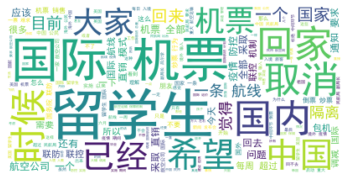

In [153]:
plot_wordcloud(' '.join(texts_splited))

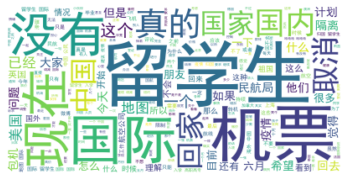

In [13]:
#
plot_wordcloud(' '.join(df[df['ÂèëÂ∏ÉËÄÖÂú∞Âå∫']=='Êµ∑Â§ñ']['texts_splited'].values), '../output/ËØç‰∫ë_Êµ∑Â§ñ.png')

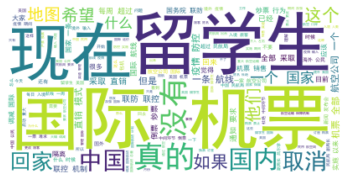

In [14]:
plot_wordcloud(' '.join(df[df['ÂèëÂ∏ÉËÄÖÂú∞Âå∫']!='Êµ∑Â§ñ']['texts_splited'].values), '../output/ËØç‰∫ë_ÂõΩÂÜÖ.png')

### Save reformed Data

# TO DO List

- Êï∞ÊçÆÊù•Ê∫êÂàÜÊûê 
- EDA  <--
    - ~~Âü∫Êú¨Êï∞ÊçÆÊÉÖÂÜµ~~
    - ~~Â§ßVÂÖ≥Ê≥®Â∫¶~~
    - ~~ÁïôÂ≠¶ÁîüÂàÜÊûê~~
    - ~~ÂÖ≥Ê≥®Â∫¶Êó∂Èó¥ÂèòÂåñ~~

- ÂæÆÂçöÊÉÖÊÑüÂàÜÊûê
    - ~~Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ~~
    - ~~api~~
    - Ëá™Â∑±ÂÅöÊ®°Âûã
    - 